In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

!pip install -q -U tensorflow-addons
!pip install -q -U keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_addons as tfa
import kerastuner as kt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels_oh = tf.one_hot(tf.squeeze(train_labels), depth=10, dtype='uint8')
test_labels_oh = tf.one_hot(tf.squeeze(test_labels), depth=10, dtype='uint8')
print(train_images.shape, test_images.shape, train_labels_oh.shape, test_labels_oh.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


In [ ]:
def create_model(dropout=1):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    if dropout > 0 and dropout < 1:
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(10))
    return model

In [ ]:
optimizer_weight_decays = [0, 1e-5, 5e-5, 1e-4, 5e-4]
loss_label_smoothings = [0.0, 0.1]
dropout_rates = [0.0, 0.4]

models, histories, names = [], [], []
for drop_id, dropout_rate in enumerate(dropout_rates):
    for loss_id, label_smoothing in enumerate(loss_label_smoothings):
        for opt_id, weight_decay in enumerate(optimizer_weight_decays):
            print(">>>> Training: (%d, %d, %d)" % (drop_id, loss_id, opt_id))
            model = create_model(dropout_rate)
            model.compile(
                optimizer=tfa.optimizers.AdamW(weight_decay=weight_decay),
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing, from_logits=True),
                metrics=['accuracy']
            )
            history = model.fit(train_images, train_labels_oh, epochs=50, validation_data=(test_images, test_labels_oh), verbose=2)
            
            models.append(model)
            histories.append(history.history)
            names.append('wd={}, ls={}, dr={}'.format(weight_decay, label_smoothing, dropout_rate))

>>>> Training: (0, 0, 0)
Epoch 1/50
1563/1563 - 6s - loss: 1.5367 - accuracy: 0.4387 - val_loss: 1.2750 - val_accuracy: 0.5423
Epoch 2/50
1563/1563 - 6s - loss: 1.1599 - accuracy: 0.5910 - val_loss: 1.0994 - val_accuracy: 0.6111
Epoch 3/50
1563/1563 - 6s - loss: 1.0279 - accuracy: 0.6382 - val_loss: 1.0896 - val_accuracy: 0.6091
Epoch 4/50
1563/1563 - 6s - loss: 0.9329 - accuracy: 0.6737 - val_loss: 0.9873 - val_accuracy: 0.6624
Epoch 5/50
1563/1563 - 6s - loss: 0.8640 - accuracy: 0.6967 - val_loss: 0.9427 - val_accuracy: 0.6738
Epoch 6/50
1563/1563 - 7s - loss: 0.8121 - accuracy: 0.7139 - val_loss: 0.9177 - val_accuracy: 0.6841
Epoch 7/50
1563/1563 - 7s - loss: 0.7624 - accuracy: 0.7318 - val_loss: 0.9101 - val_accuracy: 0.6967
Epoch 8/50
1563/1563 - 6s - loss: 0.7150 - accuracy: 0.7476 - val_loss: 0.8533 - val_accuracy: 0.7077
Epoch 9/50
1563/1563 - 6s - loss: 0.6778 - accuracy: 0.7599 - val_loss: 0.8949 - val_accuracy: 0.6952
Epoch 10/50
1563/1563 - 7s - loss: 0.6448 - accuracy: 0.7

Epoch 31/50
1563/1563 - 6s - loss: 0.2080 - accuracy: 0.9246 - val_loss: 1.4503 - val_accuracy: 0.6949
Epoch 32/50
1563/1563 - 7s - loss: 0.2133 - accuracy: 0.9206 - val_loss: 1.4175 - val_accuracy: 0.6920
Epoch 33/50
1563/1563 - 7s - loss: 0.1971 - accuracy: 0.9294 - val_loss: 1.4794 - val_accuracy: 0.6978
Epoch 34/50
1563/1563 - 7s - loss: 0.1949 - accuracy: 0.9300 - val_loss: 1.5050 - val_accuracy: 0.6899
Epoch 35/50
1563/1563 - 7s - loss: 0.1847 - accuracy: 0.9333 - val_loss: 1.5747 - val_accuracy: 0.6903
Epoch 36/50
1563/1563 - 7s - loss: 0.1800 - accuracy: 0.9344 - val_loss: 1.6339 - val_accuracy: 0.6878
Epoch 37/50
1563/1563 - 7s - loss: 0.1838 - accuracy: 0.9331 - val_loss: 1.5832 - val_accuracy: 0.6902
Epoch 38/50
1563/1563 - 6s - loss: 0.1733 - accuracy: 0.9374 - val_loss: 1.6036 - val_accuracy: 0.6949
Epoch 39/50
1563/1563 - 7s - loss: 0.1764 - accuracy: 0.9368 - val_loss: 1.6130 - val_accuracy: 0.6882
Epoch 40/50
1563/1563 - 6s - loss: 0.1609 - accuracy: 0.9421 - val_loss: 

Epoch 11/50
1563/1563 - 6s - loss: 0.7603 - accuracy: 0.7348 - val_loss: 0.8586 - val_accuracy: 0.7016
Epoch 12/50
1563/1563 - 6s - loss: 0.7468 - accuracy: 0.7390 - val_loss: 0.8365 - val_accuracy: 0.7098
Epoch 13/50
1563/1563 - 6s - loss: 0.7307 - accuracy: 0.7461 - val_loss: 0.8588 - val_accuracy: 0.7050
Epoch 14/50
1563/1563 - 5s - loss: 0.7157 - accuracy: 0.7505 - val_loss: 0.8251 - val_accuracy: 0.7120
Epoch 15/50
1563/1563 - 6s - loss: 0.7061 - accuracy: 0.7534 - val_loss: 0.8297 - val_accuracy: 0.7141
Epoch 16/50
1563/1563 - 5s - loss: 0.6921 - accuracy: 0.7601 - val_loss: 0.8453 - val_accuracy: 0.7075
Epoch 17/50
1563/1563 - 6s - loss: 0.6843 - accuracy: 0.7618 - val_loss: 0.8090 - val_accuracy: 0.7200
Epoch 18/50
1563/1563 - 5s - loss: 0.6741 - accuracy: 0.7661 - val_loss: 0.8611 - val_accuracy: 0.7045
Epoch 19/50
1563/1563 - 6s - loss: 0.6682 - accuracy: 0.7669 - val_loss: 0.8442 - val_accuracy: 0.7111
Epoch 20/50
1563/1563 - 6s - loss: 0.6584 - accuracy: 0.7703 - val_loss: 

Epoch 41/50
1563/1563 - 6s - loss: 1.1309 - accuracy: 0.6043 - val_loss: 1.1372 - val_accuracy: 0.6008
Epoch 42/50
1563/1563 - 6s - loss: 1.1185 - accuracy: 0.6096 - val_loss: 1.1015 - val_accuracy: 0.6124
Epoch 43/50
1563/1563 - 6s - loss: 1.1193 - accuracy: 0.6077 - val_loss: 1.1027 - val_accuracy: 0.6215
Epoch 44/50
1563/1563 - 7s - loss: 1.1185 - accuracy: 0.6114 - val_loss: 1.0756 - val_accuracy: 0.6246
Epoch 45/50
1563/1563 - 7s - loss: 1.1212 - accuracy: 0.6100 - val_loss: 1.0804 - val_accuracy: 0.6263
Epoch 46/50
1563/1563 - 6s - loss: 1.1230 - accuracy: 0.6067 - val_loss: 1.0989 - val_accuracy: 0.6127
Epoch 47/50
1563/1563 - 6s - loss: 1.1189 - accuracy: 0.6063 - val_loss: 1.1370 - val_accuracy: 0.6089
Epoch 48/50
1563/1563 - 7s - loss: 1.1251 - accuracy: 0.6078 - val_loss: 1.1197 - val_accuracy: 0.6096
Epoch 49/50
1563/1563 - 6s - loss: 1.1263 - accuracy: 0.6072 - val_loss: 1.1503 - val_accuracy: 0.5984
Epoch 50/50
1563/1563 - 6s - loss: 1.1206 - accuracy: 0.6089 - val_loss: 

Epoch 21/50
1563/1563 - 6s - loss: 0.8240 - accuracy: 0.8883 - val_loss: 1.2171 - val_accuracy: 0.7214
Epoch 22/50
1563/1563 - 6s - loss: 0.8166 - accuracy: 0.8941 - val_loss: 1.2194 - val_accuracy: 0.7123
Epoch 23/50
1563/1563 - 6s - loss: 0.8054 - accuracy: 0.9008 - val_loss: 1.2379 - val_accuracy: 0.7022
Epoch 24/50
1563/1563 - 6s - loss: 0.7961 - accuracy: 0.9051 - val_loss: 1.2577 - val_accuracy: 0.6993
Epoch 25/50
1563/1563 - 6s - loss: 0.7873 - accuracy: 0.9109 - val_loss: 1.2451 - val_accuracy: 0.7144
Epoch 26/50
1563/1563 - 7s - loss: 0.7805 - accuracy: 0.9137 - val_loss: 1.2582 - val_accuracy: 0.7110
Epoch 27/50
1563/1563 - 6s - loss: 0.7729 - accuracy: 0.9189 - val_loss: 1.2568 - val_accuracy: 0.7052
Epoch 28/50
1563/1563 - 6s - loss: 0.7650 - accuracy: 0.9229 - val_loss: 1.2842 - val_accuracy: 0.7037
Epoch 29/50
1563/1563 - 6s - loss: 0.7581 - accuracy: 0.9270 - val_loss: 1.2687 - val_accuracy: 0.7078
Epoch 30/50
1563/1563 - 6s - loss: 0.7501 - accuracy: 0.9327 - val_loss: 

>>>> Training: (0, 1, 3)
Epoch 1/50
1563/1563 - 6s - loss: 1.6809 - accuracy: 0.4504 - val_loss: 1.4845 - val_accuracy: 0.5503
Epoch 2/50
1563/1563 - 6s - loss: 1.4077 - accuracy: 0.5942 - val_loss: 1.3294 - val_accuracy: 0.6390
Epoch 3/50
1563/1563 - 6s - loss: 1.3046 - accuracy: 0.6451 - val_loss: 1.3380 - val_accuracy: 0.6289
Epoch 4/50
1563/1563 - 6s - loss: 1.2406 - accuracy: 0.6777 - val_loss: 1.2236 - val_accuracy: 0.6900
Epoch 5/50
1563/1563 - 7s - loss: 1.1997 - accuracy: 0.6973 - val_loss: 1.2323 - val_accuracy: 0.6795
Epoch 6/50
1563/1563 - 6s - loss: 1.1671 - accuracy: 0.7134 - val_loss: 1.1786 - val_accuracy: 0.7095
Epoch 7/50
1563/1563 - 6s - loss: 1.1471 - accuracy: 0.7235 - val_loss: 1.1995 - val_accuracy: 0.7018
Epoch 8/50
1563/1563 - 6s - loss: 1.1251 - accuracy: 0.7334 - val_loss: 1.1889 - val_accuracy: 0.7113
Epoch 9/50
1563/1563 - 6s - loss: 1.1038 - accuracy: 0.7447 - val_loss: 1.1513 - val_accuracy: 0.7299
Epoch 10/50
1563/1563 - 6s - loss: 1.0922 - accuracy: 0.7

Epoch 31/50
1563/1563 - 6s - loss: 1.3707 - accuracy: 0.6200 - val_loss: 1.3934 - val_accuracy: 0.6034
Epoch 32/50
1563/1563 - 5s - loss: 1.3694 - accuracy: 0.6172 - val_loss: 1.3705 - val_accuracy: 0.6244
Epoch 33/50
1563/1563 - 6s - loss: 1.3705 - accuracy: 0.6194 - val_loss: 1.4093 - val_accuracy: 0.6109
Epoch 34/50
1563/1563 - 6s - loss: 1.3724 - accuracy: 0.6178 - val_loss: 1.3953 - val_accuracy: 0.6005
Epoch 35/50
1563/1563 - 6s - loss: 1.3720 - accuracy: 0.6165 - val_loss: 1.4458 - val_accuracy: 0.5760
Epoch 36/50
1563/1563 - 6s - loss: 1.3701 - accuracy: 0.6180 - val_loss: 1.3628 - val_accuracy: 0.6338
Epoch 37/50
1563/1563 - 7s - loss: 1.3663 - accuracy: 0.6210 - val_loss: 1.4296 - val_accuracy: 0.5887
Epoch 38/50
1563/1563 - 6s - loss: 1.3686 - accuracy: 0.6209 - val_loss: 1.3678 - val_accuracy: 0.6169
Epoch 39/50
1563/1563 - 6s - loss: 1.3696 - accuracy: 0.6200 - val_loss: 1.3975 - val_accuracy: 0.6190
Epoch 40/50
1563/1563 - 6s - loss: 1.3718 - accuracy: 0.6176 - val_loss: 

Epoch 11/50
1563/1563 - 6s - loss: 0.7771 - accuracy: 0.7257 - val_loss: 0.8982 - val_accuracy: 0.7000
Epoch 12/50
1563/1563 - 7s - loss: 0.7545 - accuracy: 0.7348 - val_loss: 0.8676 - val_accuracy: 0.6992
Epoch 13/50
1563/1563 - 7s - loss: 0.7283 - accuracy: 0.7448 - val_loss: 0.8343 - val_accuracy: 0.7173
Epoch 14/50
1563/1563 - 7s - loss: 0.7091 - accuracy: 0.7492 - val_loss: 0.8786 - val_accuracy: 0.7127
Epoch 15/50
1563/1563 - 6s - loss: 0.6850 - accuracy: 0.7571 - val_loss: 0.8977 - val_accuracy: 0.7045
Epoch 16/50
1563/1563 - 7s - loss: 0.6655 - accuracy: 0.7646 - val_loss: 0.8440 - val_accuracy: 0.7201
Epoch 17/50
1563/1563 - 7s - loss: 0.6531 - accuracy: 0.7692 - val_loss: 0.8697 - val_accuracy: 0.7164
Epoch 18/50
1563/1563 - 7s - loss: 0.6380 - accuracy: 0.7711 - val_loss: 0.8665 - val_accuracy: 0.7222
Epoch 19/50
1563/1563 - 7s - loss: 0.6275 - accuracy: 0.7759 - val_loss: 0.8564 - val_accuracy: 0.7228
Epoch 20/50
1563/1563 - 7s - loss: 0.6136 - accuracy: 0.7806 - val_loss: 

Epoch 41/50
1563/1563 - 6s - loss: 0.5217 - accuracy: 0.8180 - val_loss: 0.7723 - val_accuracy: 0.7466
Epoch 42/50
1563/1563 - 7s - loss: 0.5248 - accuracy: 0.8156 - val_loss: 0.7824 - val_accuracy: 0.7460
Epoch 43/50
1563/1563 - 6s - loss: 0.5162 - accuracy: 0.8210 - val_loss: 0.7792 - val_accuracy: 0.7459
Epoch 44/50
1563/1563 - 6s - loss: 0.5191 - accuracy: 0.8197 - val_loss: 0.7418 - val_accuracy: 0.7493
Epoch 45/50
1563/1563 - 6s - loss: 0.5142 - accuracy: 0.8209 - val_loss: 0.8155 - val_accuracy: 0.7339
Epoch 46/50
1563/1563 - 5s - loss: 0.5093 - accuracy: 0.8255 - val_loss: 0.8152 - val_accuracy: 0.7321
Epoch 47/50
1563/1563 - 6s - loss: 0.5104 - accuracy: 0.8220 - val_loss: 0.7884 - val_accuracy: 0.7411
Epoch 48/50
1563/1563 - 6s - loss: 0.5079 - accuracy: 0.8248 - val_loss: 0.8042 - val_accuracy: 0.7370
Epoch 49/50
1563/1563 - 6s - loss: 0.5044 - accuracy: 0.8235 - val_loss: 0.7904 - val_accuracy: 0.7421
Epoch 50/50
1563/1563 - 6s - loss: 0.5050 - accuracy: 0.8258 - val_loss: 

Epoch 21/50
1563/1563 - 6s - loss: 1.2839 - accuracy: 0.5467 - val_loss: 1.1970 - val_accuracy: 0.5719
Epoch 22/50
1563/1563 - 6s - loss: 1.2853 - accuracy: 0.5462 - val_loss: 1.2516 - val_accuracy: 0.5560
Epoch 23/50
1563/1563 - 6s - loss: 1.2864 - accuracy: 0.5474 - val_loss: 1.2331 - val_accuracy: 0.5718
Epoch 24/50
1563/1563 - 6s - loss: 1.2904 - accuracy: 0.5457 - val_loss: 1.2164 - val_accuracy: 0.5799
Epoch 25/50
1563/1563 - 6s - loss: 1.2863 - accuracy: 0.5485 - val_loss: 1.1897 - val_accuracy: 0.5905
Epoch 26/50
1563/1563 - 5s - loss: 1.2749 - accuracy: 0.5505 - val_loss: 1.1564 - val_accuracy: 0.5880
Epoch 27/50
1563/1563 - 6s - loss: 1.2790 - accuracy: 0.5502 - val_loss: 1.1813 - val_accuracy: 0.5780
Epoch 28/50
1563/1563 - 5s - loss: 1.2784 - accuracy: 0.5488 - val_loss: 1.2243 - val_accuracy: 0.5676
Epoch 29/50
1563/1563 - 6s - loss: 1.2692 - accuracy: 0.5544 - val_loss: 1.1331 - val_accuracy: 0.5993
Epoch 30/50
1563/1563 - 6s - loss: 1.2774 - accuracy: 0.5487 - val_loss: 

>>>> Training: (1, 1, 1)
Epoch 1/50
1563/1563 - 7s - loss: 1.7785 - accuracy: 0.4039 - val_loss: 1.5136 - val_accuracy: 0.5384
Epoch 2/50
1563/1563 - 6s - loss: 1.5173 - accuracy: 0.5491 - val_loss: 1.3826 - val_accuracy: 0.6147
Epoch 3/50
1563/1563 - 6s - loss: 1.4126 - accuracy: 0.6049 - val_loss: 1.3490 - val_accuracy: 0.6310
Epoch 4/50
1563/1563 - 6s - loss: 1.3517 - accuracy: 0.6382 - val_loss: 1.2988 - val_accuracy: 0.6557
Epoch 5/50
1563/1563 - 6s - loss: 1.3010 - accuracy: 0.6639 - val_loss: 1.2282 - val_accuracy: 0.6864
Epoch 6/50
1563/1563 - 6s - loss: 1.2646 - accuracy: 0.6831 - val_loss: 1.2364 - val_accuracy: 0.6861
Epoch 7/50
1563/1563 - 7s - loss: 1.2362 - accuracy: 0.6972 - val_loss: 1.2354 - val_accuracy: 0.6815
Epoch 8/50
1563/1563 - 7s - loss: 1.2068 - accuracy: 0.7138 - val_loss: 1.1851 - val_accuracy: 0.7083
Epoch 9/50
1563/1563 - 6s - loss: 1.1822 - accuracy: 0.7258 - val_loss: 1.1628 - val_accuracy: 0.7175
Epoch 10/50
1563/1563 - 7s - loss: 1.1631 - accuracy: 0.7

Epoch 31/50
1563/1563 - 6s - loss: 1.0283 - accuracy: 0.7985 - val_loss: 1.1035 - val_accuracy: 0.7461
Epoch 32/50
1563/1563 - 6s - loss: 1.0252 - accuracy: 0.8015 - val_loss: 1.1217 - val_accuracy: 0.7385
Epoch 33/50
1563/1563 - 6s - loss: 1.0195 - accuracy: 0.8030 - val_loss: 1.1169 - val_accuracy: 0.7425
Epoch 34/50
1563/1563 - 6s - loss: 1.0177 - accuracy: 0.8050 - val_loss: 1.1242 - val_accuracy: 0.7411
Epoch 35/50
1563/1563 - 6s - loss: 1.0175 - accuracy: 0.8036 - val_loss: 1.1166 - val_accuracy: 0.7428
Epoch 36/50
1563/1563 - 6s - loss: 1.0126 - accuracy: 0.8067 - val_loss: 1.1507 - val_accuracy: 0.7286
Epoch 37/50
1563/1563 - 6s - loss: 1.0115 - accuracy: 0.8072 - val_loss: 1.1318 - val_accuracy: 0.7357
Epoch 38/50
1563/1563 - 6s - loss: 1.0069 - accuracy: 0.8087 - val_loss: 1.1015 - val_accuracy: 0.7477
Epoch 39/50
1563/1563 - 6s - loss: 1.0050 - accuracy: 0.8093 - val_loss: 1.1310 - val_accuracy: 0.7362
Epoch 40/50
1563/1563 - 6s - loss: 1.0035 - accuracy: 0.8105 - val_loss: 

Epoch 11/50
1563/1563 - 5s - loss: 1.4976 - accuracy: 0.5605 - val_loss: 1.4362 - val_accuracy: 0.5801
Epoch 12/50
1563/1563 - 6s - loss: 1.4888 - accuracy: 0.5646 - val_loss: 1.4064 - val_accuracy: 0.6017
Epoch 13/50
1563/1563 - 5s - loss: 1.4859 - accuracy: 0.5660 - val_loss: 1.4063 - val_accuracy: 0.6020
Epoch 14/50
1563/1563 - 6s - loss: 1.4867 - accuracy: 0.5642 - val_loss: 1.4263 - val_accuracy: 0.6046
Epoch 15/50
1563/1563 - 6s - loss: 1.4754 - accuracy: 0.5697 - val_loss: 1.3845 - val_accuracy: 0.6195
Epoch 16/50
1563/1563 - 6s - loss: 1.4815 - accuracy: 0.5690 - val_loss: 1.3881 - val_accuracy: 0.6074
Epoch 17/50
1563/1563 - 6s - loss: 1.4732 - accuracy: 0.5719 - val_loss: 1.3888 - val_accuracy: 0.6029
Epoch 18/50
1563/1563 - 6s - loss: 1.4741 - accuracy: 0.5708 - val_loss: 1.3955 - val_accuracy: 0.6052
Epoch 19/50
1563/1563 - 6s - loss: 1.4712 - accuracy: 0.5731 - val_loss: 1.4253 - val_accuracy: 0.5950
Epoch 20/50
1563/1563 - 6s - loss: 1.4736 - accuracy: 0.5744 - val_loss: 

In [ ]:
print("| %27s | %10s | %10s | %15s | %15s |" % ("Name", "test loss", "test acc", "max train acc", "max val acc"))
for mm, hist, nn in zip(models, histories, names):
    test_loss, test_acc = mm.evaluate(test_images,  test_labels_oh, verbose=0)
    max_acc, max_val_acc = max(hist['accuracy']), max(hist['val_accuracy'])
    print('| %27s | %10.4f | %10.4f | %15.4f | %15.4f |' % (nn, test_loss, test_acc, max_acc, max_val_acc))

|                        Name |  test loss |   test acc |   max train acc |     max val acc |
|        wd=0, ls=0.0, dr=0.0 |     2.6158 |     0.6734 |          0.9530 |          0.7077 |
|    wd=1e-05, ls=0.0, dr=0.0 |     1.7356 |     0.6876 |          0.9500 |          0.7229 |
|    wd=5e-05, ls=0.0, dr=0.0 |     0.8948 |     0.7229 |          0.8721 |          0.7378 |
|   wd=0.0001, ls=0.0, dr=0.0 |     0.7588 |     0.7380 |          0.8089 |          0.7454 |
|   wd=0.0005, ls=0.0, dr=0.0 |     1.1259 |     0.6174 |          0.6114 |          0.6379 |
|        wd=0, ls=0.1, dr=0.0 |     1.3922 |     0.6929 |          0.9837 |          0.7289 |
|    wd=1e-05, ls=0.1, dr=0.0 |     1.3664 |     0.6935 |          0.9670 |          0.7272 |
|    wd=5e-05, ls=0.1, dr=0.0 |     1.1399 |     0.7322 |          0.8726 |          0.7418 |
|   wd=0.0001, ls=0.1, dr=0.0 |     1.1117 |     0.7436 |          0.8254 |          0.7548 |
|   wd=0.0005, ls=0.1, dr=0.0 |     1.3724 |     0.6242 |   

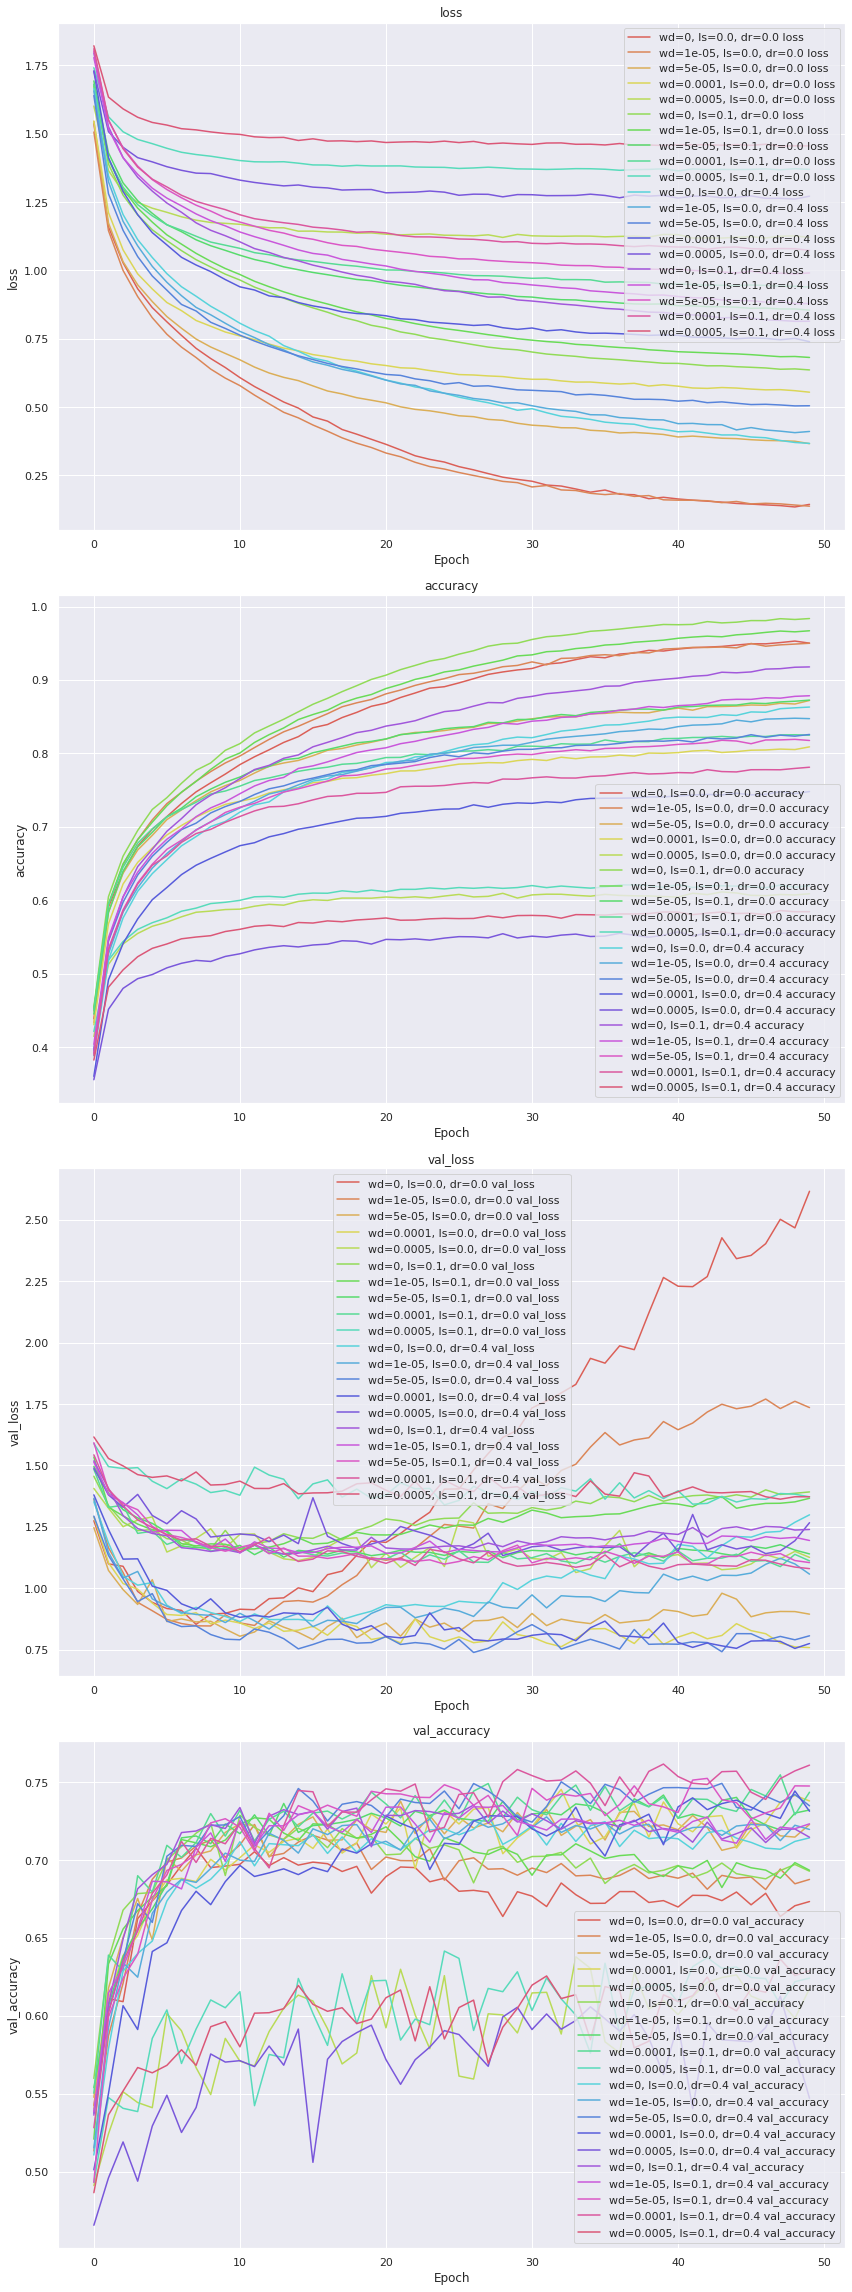

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

def compare_histories(histories, names, color_palette='hls', keys=None):
    # cm = plt.get_cmap('gist_rainbow')
    # num_colors = len(histories)
    # colors = np.random.permutation([cm(1.*i/num_colors) for i in range(num_colors)])
    colors = sns.color_palette(color_palette, len(histories))
    keys = keys if keys is not None else histories[0].keys()
    fig, axes = plt.subplots(len(keys), 1, figsize=(12, 8 * len(keys)))
    axes = axes if isinstance(axes, np.ndarray) else [axes]
    for kk, ax in zip(keys, axes):
        ax.set_title(kk)
        ax.set_prop_cycle('color', colors)
        for hist, name in zip(histories, names):
            ax.plot(hist[kk], label=name + " {}".format(kk))
        ax.set_xlabel('Epoch')
        ax.set_ylabel(kk)
        ax.legend()
    plt.tight_layout()
    plt.show()

# compare_histories(hists, names, keys=['accuracy', 'val_accuracy'])
compare_histories(histories, names)

Here is a show of the whole history, so we can investigate it later.

In [ ]:
import json
with open('./hists.json', 'w') as ff:
    json.dump(histories, ff)
histories

[{'loss': [1.5366547107696533,
   1.1598858833312988,
   1.0278716087341309,
   0.9329208731651306,
   0.8640207052230835,
   0.8120726346969604,
   0.7623676061630249,
   0.7149890661239624,
   0.6777645945549011,
   0.6447680592536926,
   0.6079640984535217,
   0.575234591960907,
   0.5469639897346497,
   0.5185845494270325,
   0.49655449390411377,
   0.46401453018188477,
   0.4487166106700897,
   0.4180787205696106,
   0.4009702205657959,
   0.3823161721229553,
   0.3639114201068878,
   0.34334465861320496,
   0.3219854235649109,
   0.30884605646133423,
   0.2990216910839081,
   0.282229483127594,
   0.2705209255218506,
   0.2568151652812958,
   0.24368515610694885,
   0.23566043376922607,
   0.22883117198944092,
   0.21491484344005585,
   0.21123389899730682,
   0.2005433589220047,
   0.18886755406856537,
   0.19669444859027863,
   0.18134671449661255,
   0.17950238287448883,
   0.16495384275913239,
   0.17014223337173462,
   0.1639838069677353,
   0.15967589616775513,
   0.1559437

Use [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) to search hyperparameters `weight_decay` / `label_smoothing`.

In [ ]:
!rm my_dir -rf
def create_model(hp):
    hp_wd = hp.Choice("weight_decay", values=[0.0, 1e-5, 5e-5, 1e-4])
    hp_ls = hp.Choice("label_smoothing", values=[0.0, 0.1])
    hp_dropout = hp.Choice("dropout_rate", values=[0.0, 0.4])

    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(rate=hp_dropout))
    model.add(keras.layers.Dense(10))

    model.compile(
        optimizer=tfa.optimizers.AdamW(weight_decay=hp_wd),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=hp_ls),
        metrics = ['accuracy'])

    return model

tuner = kt.Hyperband(create_model,
                     objective = 'val_accuracy',
                     max_epochs = 50,
                     factor = 4,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

tuner.search(train_images, train_labels_oh, epochs = 50, validation_data = (test_images, test_labels_oh))

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.2989 - accuracy: 0.06 - ETA: 4s - loss: 2.3086 - accuracy: 0.10 - ETA: 5s - loss: 2.2968 - accuracy: 0.10 - ETA: 4s - loss: 2.2714 - accuracy: 0.13 - ETA: 4s - loss: 2.2542 - accuracy: 0.14 - ETA: 4s - loss: 2.2348 - accuracy: 0.15 - ETA: 4s - loss: 2.2068 - accuracy: 0.17 - ETA: 4s - loss: 2.1760 - accuracy: 0.19 - ETA: 4s - loss: 2.1499 - accuracy: 0.20 - ETA: 4s - loss: 2.1398 - accuracy: 0.21 - ETA: 4s - loss: 2.1225 - accuracy: 0.22 - ETA: 4s - loss: 2.1081 - accuracy: 0.23 - ETA: 4s - loss: 2.0952 - accuracy: 0.24 - ETA: 4s - loss: 2.0830 - accuracy: 0.24 - ETA: 4s - loss: 2.0697 - accuracy: 0.25 - ETA: 4s - loss: 2.0602 - accuracy: 0.25 - ETA: 4s - loss: 2.0484 - accuracy: 0.26 - ETA: 4s - loss: 2.0372 - accuracy: 0.27 - ETA: 4s - loss: 2.0272 - accuracy: 0.27 - ETA: 3s - loss: 2.0156 - accuracy: 0.28 - ETA: 3s - loss: 2.0076 - accuracy: 0.28 - ETA: 3s - loss: 1.9986 - accuracy: 0.29 - ETA: 3s - loss: 1.989

Epoch 3/4
1563/1563 [==============================] - ETA: 0s - loss: 1.4029 - accuracy: 0.59 - ETA: 4s - loss: 1.3151 - accuracy: 0.62 - ETA: 4s - loss: 1.2956 - accuracy: 0.64 - ETA: 4s - loss: 1.3024 - accuracy: 0.63 - ETA: 4s - loss: 1.3231 - accuracy: 0.63 - ETA: 4s - loss: 1.3236 - accuracy: 0.63 - ETA: 4s - loss: 1.3172 - accuracy: 0.64 - ETA: 4s - loss: 1.3191 - accuracy: 0.63 - ETA: 4s - loss: 1.3102 - accuracy: 0.64 - ETA: 4s - loss: 1.3108 - accuracy: 0.64 - ETA: 4s - loss: 1.3114 - accuracy: 0.64 - ETA: 4s - loss: 1.3095 - accuracy: 0.64 - ETA: 4s - loss: 1.3090 - accuracy: 0.63 - ETA: 4s - loss: 1.3133 - accuracy: 0.63 - ETA: 4s - loss: 1.3123 - accuracy: 0.64 - ETA: 3s - loss: 1.3125 - accuracy: 0.64 - ETA: 3s - loss: 1.3120 - accuracy: 0.63 - ETA: 3s - loss: 1.3132 - accuracy: 0.63 - ETA: 3s - loss: 1.3121 - accuracy: 0.63 - ETA: 3s - loss: 1.3123 - accuracy: 0.63 - ETA: 3s - loss: 1.3131 - accuracy: 0.63 - ETA: 3s - loss: 1.3129 - accuracy: 0.63 - ETA: 3s - loss: 1.311

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3009 - accuracy: 0.09 - ETA: 4s - loss: 2.3001 - accuracy: 0.11 - ETA: 4s - loss: 2.2897 - accuracy: 0.11 - ETA: 4s - loss: 2.2722 - accuracy: 0.12 - ETA: 4s - loss: 2.2482 - accuracy: 0.14 - ETA: 4s - loss: 2.2221 - accuracy: 0.16 - ETA: 4s - loss: 2.1981 - accuracy: 0.17 - ETA: 4s - loss: 2.1747 - accuracy: 0.18 - ETA: 4s - loss: 2.1595 - accuracy: 0.18 - ETA: 4s - loss: 2.1451 - accuracy: 0.19 - ETA: 4s - loss: 2.1374 - accuracy: 0.20 - ETA: 4s - loss: 2.1258 - accuracy: 0.20 - ETA: 4s - loss: 2.1111 - accuracy: 0.20 - ETA: 4s - loss: 2.0914 - accuracy: 0.21 - ETA: 4s - loss: 2.0750 - accuracy: 0.22 - ETA: 4s - loss: 2.0625 - accuracy: 0.22 - ETA: 3s - loss: 2.0474 - accuracy: 0.23 - ETA: 3s - loss: 2.0307 - accuracy: 0.23 - ETA: 3s - loss: 2.0204 - accuracy: 0.24 - ETA: 3s - loss: 2.0123 - accuracy: 0.24 - ETA: 3s - loss: 2.0030 - accuracy: 0.25 - ETA: 3s - loss: 1.9911 - accuracy: 0.25 - ETA: 3s - loss: 1.980

1563/1563 [==============================] - ETA: 0s - loss: 1.5607 - accuracy: 0.40 - ETA: 5s - loss: 1.2446 - accuracy: 0.56 - ETA: 5s - loss: 1.2197 - accuracy: 0.55 - ETA: 5s - loss: 1.2061 - accuracy: 0.56 - ETA: 5s - loss: 1.1936 - accuracy: 0.57 - ETA: 5s - loss: 1.1842 - accuracy: 0.58 - ETA: 5s - loss: 1.1956 - accuracy: 0.57 - ETA: 5s - loss: 1.1959 - accuracy: 0.57 - ETA: 5s - loss: 1.2021 - accuracy: 0.57 - ETA: 4s - loss: 1.2039 - accuracy: 0.57 - ETA: 4s - loss: 1.1985 - accuracy: 0.57 - ETA: 4s - loss: 1.1972 - accuracy: 0.57 - ETA: 4s - loss: 1.2029 - accuracy: 0.57 - ETA: 4s - loss: 1.2007 - accuracy: 0.57 - ETA: 4s - loss: 1.1995 - accuracy: 0.57 - ETA: 4s - loss: 1.2024 - accuracy: 0.57 - ETA: 4s - loss: 1.1997 - accuracy: 0.57 - ETA: 4s - loss: 1.1939 - accuracy: 0.57 - ETA: 4s - loss: 1.1914 - accuracy: 0.57 - ETA: 4s - loss: 1.1923 - accuracy: 0.57 - ETA: 4s - loss: 1.1904 - accuracy: 0.57 - ETA: 4s - loss: 1.1936 - accuracy: 0.57 - ETA: 4s - loss: 1.1930 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3550 - accuracy: 0.09 - ETA: 4s - loss: 2.3066 - accuracy: 0.09 - ETA: 4s - loss: 2.2820 - accuracy: 0.12 - ETA: 4s - loss: 2.2454 - accuracy: 0.13 - ETA: 4s - loss: 2.2033 - accuracy: 0.16 - ETA: 4s - loss: 2.1856 - accuracy: 0.17 - ETA: 4s - loss: 2.1711 - accuracy: 0.18 - ETA: 4s - loss: 2.1574 - accuracy: 0.18 - ETA: 4s - loss: 2.1332 - accuracy: 0.19 - ETA: 4s - loss: 2.1098 - accuracy: 0.21 - ETA: 4s - loss: 2.0894 - accuracy: 0.21 - ETA: 4s - loss: 2.0737 - accuracy: 0.22 - ETA: 4s - loss: 2.0565 - accuracy: 0.23 - ETA: 4s - loss: 2.0422 - accuracy: 0.23 - ETA: 4s - loss: 2.0303 - accuracy: 0.24 - ETA: 4s - loss: 2.0184 - accuracy: 0.25 - ETA: 3s - loss: 2.0102 - accuracy: 0.25 - ETA: 3s - loss: 2.0013 - accuracy: 0.26 - ETA: 3s - loss: 1.9903 - accuracy: 0.26 - ETA: 3s - loss: 1.9806 - accuracy: 0.26 - ETA: 3s - loss: 1.9703 - accuracy: 0.27 - ETA: 3s - loss: 1.9578 - accuracy: 0.27 - ETA: 3s - loss: 1.944

1563/1563 [==============================] - ETA: 0s - loss: 1.2123 - accuracy: 0.53 - ETA: 4s - loss: 1.0727 - accuracy: 0.61 - ETA: 4s - loss: 1.0766 - accuracy: 0.62 - ETA: 4s - loss: 1.0741 - accuracy: 0.62 - ETA: 4s - loss: 1.0846 - accuracy: 0.61 - ETA: 4s - loss: 1.0739 - accuracy: 0.62 - ETA: 4s - loss: 1.0731 - accuracy: 0.62 - ETA: 4s - loss: 1.0742 - accuracy: 0.62 - ETA: 4s - loss: 1.0653 - accuracy: 0.62 - ETA: 4s - loss: 1.0574 - accuracy: 0.62 - ETA: 4s - loss: 1.0587 - accuracy: 0.62 - ETA: 4s - loss: 1.0541 - accuracy: 0.62 - ETA: 4s - loss: 1.0582 - accuracy: 0.62 - ETA: 4s - loss: 1.0620 - accuracy: 0.62 - ETA: 4s - loss: 1.0671 - accuracy: 0.62 - ETA: 4s - loss: 1.0661 - accuracy: 0.62 - ETA: 4s - loss: 1.0597 - accuracy: 0.62 - ETA: 4s - loss: 1.0595 - accuracy: 0.62 - ETA: 4s - loss: 1.0538 - accuracy: 0.63 - ETA: 4s - loss: 1.0543 - accuracy: 0.63 - ETA: 4s - loss: 1.0559 - accuracy: 0.63 - ETA: 3s - loss: 1.0557 - accuracy: 0.63 - ETA: 3s - loss: 1.0589 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3064 - accuracy: 0.15 - ETA: 4s - loss: 2.2991 - accuracy: 0.13 - ETA: 4s - loss: 2.2766 - accuracy: 0.15 - ETA: 4s - loss: 2.2448 - accuracy: 0.15 - ETA: 4s - loss: 2.2165 - accuracy: 0.17 - ETA: 4s - loss: 2.2010 - accuracy: 0.18 - ETA: 4s - loss: 2.1899 - accuracy: 0.19 - ETA: 4s - loss: 2.1771 - accuracy: 0.19 - ETA: 4s - loss: 2.1629 - accuracy: 0.20 - ETA: 4s - loss: 2.1450 - accuracy: 0.21 - ETA: 4s - loss: 2.1270 - accuracy: 0.22 - ETA: 4s - loss: 2.1088 - accuracy: 0.23 - ETA: 4s - loss: 2.0926 - accuracy: 0.23 - ETA: 4s - loss: 2.0806 - accuracy: 0.24 - ETA: 4s - loss: 2.0711 - accuracy: 0.25 - ETA: 4s - loss: 2.0612 - accuracy: 0.25 - ETA: 4s - loss: 2.0488 - accuracy: 0.26 - ETA: 4s - loss: 2.0363 - accuracy: 0.27 - ETA: 4s - loss: 2.0296 - accuracy: 0.27 - ETA: 4s - loss: 2.0216 - accuracy: 0.27 - ETA: 3s - loss: 2.0142 - accuracy: 0.28 - ETA: 3s - loss: 2.0086 - accuracy: 0.28 - ETA: 3s - loss: 2.001

1563/1563 [==============================] - ETA: 0s - loss: 1.1554 - accuracy: 0.78 - ETA: 5s - loss: 1.2925 - accuracy: 0.65 - ETA: 5s - loss: 1.3017 - accuracy: 0.65 - ETA: 5s - loss: 1.3109 - accuracy: 0.64 - ETA: 5s - loss: 1.3173 - accuracy: 0.64 - ETA: 5s - loss: 1.3178 - accuracy: 0.64 - ETA: 5s - loss: 1.2997 - accuracy: 0.65 - ETA: 5s - loss: 1.3097 - accuracy: 0.64 - ETA: 5s - loss: 1.3091 - accuracy: 0.64 - ETA: 4s - loss: 1.3117 - accuracy: 0.64 - ETA: 4s - loss: 1.3076 - accuracy: 0.64 - ETA: 4s - loss: 1.3078 - accuracy: 0.64 - ETA: 4s - loss: 1.3089 - accuracy: 0.64 - ETA: 4s - loss: 1.3093 - accuracy: 0.64 - ETA: 4s - loss: 1.3078 - accuracy: 0.64 - ETA: 4s - loss: 1.3060 - accuracy: 0.64 - ETA: 4s - loss: 1.3084 - accuracy: 0.64 - ETA: 4s - loss: 1.3095 - accuracy: 0.64 - ETA: 4s - loss: 1.3075 - accuracy: 0.64 - ETA: 4s - loss: 1.3087 - accuracy: 0.64 - ETA: 4s - loss: 1.3078 - accuracy: 0.64 - ETA: 4s - loss: 1.3098 - accuracy: 0.64 - ETA: 4s - loss: 1.3123 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3097 - accuracy: 0.03 - ETA: 4s - loss: 2.2850 - accuracy: 0.13 - ETA: 4s - loss: 2.2683 - accuracy: 0.14 - ETA: 4s - loss: 2.2452 - accuracy: 0.15 - ETA: 4s - loss: 2.2151 - accuracy: 0.16 - ETA: 4s - loss: 2.1905 - accuracy: 0.17 - ETA: 4s - loss: 2.1569 - accuracy: 0.19 - ETA: 4s - loss: 2.1349 - accuracy: 0.19 - ETA: 4s - loss: 2.1198 - accuracy: 0.20 - ETA: 4s - loss: 2.0946 - accuracy: 0.21 - ETA: 4s - loss: 2.0675 - accuracy: 0.22 - ETA: 4s - loss: 2.0426 - accuracy: 0.23 - ETA: 4s - loss: 2.0359 - accuracy: 0.23 - ETA: 4s - loss: 2.0206 - accuracy: 0.24 - ETA: 4s - loss: 2.0104 - accuracy: 0.25 - ETA: 4s - loss: 1.9943 - accuracy: 0.25 - ETA: 4s - loss: 1.9853 - accuracy: 0.25 - ETA: 4s - loss: 1.9698 - accuracy: 0.26 - ETA: 4s - loss: 1.9585 - accuracy: 0.26 - ETA: 4s - loss: 1.9496 - accuracy: 0.27 - ETA: 4s - loss: 1.9391 - accuracy: 0.27 - ETA: 4s - loss: 1.9252 - accuracy: 0.28 - ETA: 4s - loss: 1.914

1563/1563 [==============================] - ETA: 0s - loss: 0.8925 - accuracy: 0.65 - ETA: 5s - loss: 0.9792 - accuracy: 0.64 - ETA: 5s - loss: 0.9876 - accuracy: 0.64 - ETA: 5s - loss: 0.9782 - accuracy: 0.65 - ETA: 5s - loss: 0.9982 - accuracy: 0.64 - ETA: 5s - loss: 1.0125 - accuracy: 0.64 - ETA: 4s - loss: 1.0258 - accuracy: 0.64 - ETA: 4s - loss: 1.0191 - accuracy: 0.64 - ETA: 4s - loss: 1.0235 - accuracy: 0.63 - ETA: 4s - loss: 1.0200 - accuracy: 0.63 - ETA: 4s - loss: 1.0201 - accuracy: 0.63 - ETA: 4s - loss: 1.0194 - accuracy: 0.63 - ETA: 4s - loss: 1.0063 - accuracy: 0.64 - ETA: 4s - loss: 1.0006 - accuracy: 0.64 - ETA: 4s - loss: 1.0026 - accuracy: 0.64 - ETA: 4s - loss: 1.0024 - accuracy: 0.64 - ETA: 4s - loss: 1.0019 - accuracy: 0.64 - ETA: 4s - loss: 1.0033 - accuracy: 0.64 - ETA: 3s - loss: 1.0048 - accuracy: 0.64 - ETA: 3s - loss: 1.0034 - accuracy: 0.64 - ETA: 3s - loss: 1.0049 - accuracy: 0.64 - ETA: 3s - loss: 1.0025 - accuracy: 0.64 - ETA: 3s - loss: 1.0067 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3042 - accuracy: 0.06 - ETA: 4s - loss: 2.3070 - accuracy: 0.10 - ETA: 4s - loss: 2.2907 - accuracy: 0.11 - ETA: 4s - loss: 2.2660 - accuracy: 0.14 - ETA: 4s - loss: 2.2436 - accuracy: 0.14 - ETA: 4s - loss: 2.2209 - accuracy: 0.15 - ETA: 4s - loss: 2.2086 - accuracy: 0.16 - ETA: 4s - loss: 2.1858 - accuracy: 0.17 - ETA: 4s - loss: 2.1616 - accuracy: 0.18 - ETA: 4s - loss: 2.1407 - accuracy: 0.19 - ETA: 4s - loss: 2.1234 - accuracy: 0.20 - ETA: 4s - loss: 2.1107 - accuracy: 0.20 - ETA: 4s - loss: 2.0997 - accuracy: 0.21 - ETA: 4s - loss: 2.0854 - accuracy: 0.21 - ETA: 4s - loss: 2.0702 - accuracy: 0.22 - ETA: 4s - loss: 2.0606 - accuracy: 0.22 - ETA: 4s - loss: 2.0487 - accuracy: 0.22 - ETA: 4s - loss: 2.0381 - accuracy: 0.23 - ETA: 3s - loss: 2.0308 - accuracy: 0.23 - ETA: 3s - loss: 2.0168 - accuracy: 0.24 - ETA: 3s - loss: 2.0061 - accuracy: 0.25 - ETA: 3s - loss: 1.9978 - accuracy: 0.25 - ETA: 3s - loss: 1.987

1563/1563 [==============================] - ETA: 0s - loss: 1.2380 - accuracy: 0.59 - ETA: 4s - loss: 1.2317 - accuracy: 0.60 - ETA: 4s - loss: 1.2091 - accuracy: 0.59 - ETA: 4s - loss: 1.2246 - accuracy: 0.58 - ETA: 4s - loss: 1.2129 - accuracy: 0.58 - ETA: 4s - loss: 1.1891 - accuracy: 0.59 - ETA: 4s - loss: 1.1988 - accuracy: 0.58 - ETA: 4s - loss: 1.1936 - accuracy: 0.58 - ETA: 4s - loss: 1.1982 - accuracy: 0.58 - ETA: 4s - loss: 1.2002 - accuracy: 0.58 - ETA: 4s - loss: 1.2018 - accuracy: 0.58 - ETA: 4s - loss: 1.1952 - accuracy: 0.58 - ETA: 4s - loss: 1.2023 - accuracy: 0.58 - ETA: 4s - loss: 1.2051 - accuracy: 0.58 - ETA: 4s - loss: 1.2010 - accuracy: 0.58 - ETA: 4s - loss: 1.2069 - accuracy: 0.58 - ETA: 4s - loss: 1.2112 - accuracy: 0.57 - ETA: 4s - loss: 1.2096 - accuracy: 0.57 - ETA: 4s - loss: 1.2077 - accuracy: 0.57 - ETA: 4s - loss: 1.2081 - accuracy: 0.58 - ETA: 3s - loss: 1.2092 - accuracy: 0.58 - ETA: 3s - loss: 1.2112 - accuracy: 0.58 - ETA: 3s - loss: 1.2117 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3007 - accuracy: 0.15 - ETA: 4s - loss: 2.2915 - accuracy: 0.12 - ETA: 4s - loss: 2.2911 - accuracy: 0.12 - ETA: 4s - loss: 2.2818 - accuracy: 0.13 - ETA: 4s - loss: 2.2692 - accuracy: 0.14 - ETA: 4s - loss: 2.2506 - accuracy: 0.15 - ETA: 4s - loss: 2.2297 - accuracy: 0.16 - ETA: 4s - loss: 2.2039 - accuracy: 0.17 - ETA: 4s - loss: 2.1937 - accuracy: 0.18 - ETA: 4s - loss: 2.1827 - accuracy: 0.18 - ETA: 4s - loss: 2.1677 - accuracy: 0.19 - ETA: 4s - loss: 2.1569 - accuracy: 0.19 - ETA: 4s - loss: 2.1495 - accuracy: 0.20 - ETA: 4s - loss: 2.1407 - accuracy: 0.20 - ETA: 4s - loss: 2.1281 - accuracy: 0.21 - ETA: 4s - loss: 2.1175 - accuracy: 0.22 - ETA: 4s - loss: 2.1121 - accuracy: 0.22 - ETA: 3s - loss: 2.1047 - accuracy: 0.22 - ETA: 3s - loss: 2.0995 - accuracy: 0.23 - ETA: 3s - loss: 2.0940 - accuracy: 0.23 - ETA: 3s - loss: 2.0879 - accuracy: 0.23 - ETA: 3s - loss: 2.0803 - accuracy: 0.24 - ETA: 3s - loss: 2.076

1563/1563 [==============================] - ETA: 0s - loss: 1.5727 - accuracy: 0.62 - ETA: 4s - loss: 1.5390 - accuracy: 0.55 - ETA: 4s - loss: 1.5214 - accuracy: 0.56 - ETA: 4s - loss: 1.5250 - accuracy: 0.54 - ETA: 4s - loss: 1.5207 - accuracy: 0.55 - ETA: 4s - loss: 1.5270 - accuracy: 0.54 - ETA: 4s - loss: 1.5238 - accuracy: 0.54 - ETA: 4s - loss: 1.5178 - accuracy: 0.54 - ETA: 4s - loss: 1.5194 - accuracy: 0.54 - ETA: 4s - loss: 1.5124 - accuracy: 0.54 - ETA: 4s - loss: 1.5074 - accuracy: 0.55 - ETA: 4s - loss: 1.5062 - accuracy: 0.55 - ETA: 4s - loss: 1.5034 - accuracy: 0.55 - ETA: 4s - loss: 1.5036 - accuracy: 0.55 - ETA: 4s - loss: 1.5043 - accuracy: 0.55 - ETA: 4s - loss: 1.5040 - accuracy: 0.55 - ETA: 4s - loss: 1.5052 - accuracy: 0.55 - ETA: 4s - loss: 1.5025 - accuracy: 0.55 - ETA: 4s - loss: 1.5010 - accuracy: 0.55 - ETA: 3s - loss: 1.4994 - accuracy: 0.56 - ETA: 3s - loss: 1.4993 - accuracy: 0.55 - ETA: 3s - loss: 1.4976 - accuracy: 0.55 - ETA: 3s - loss: 1.4979 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3004 - accuracy: 0.09 - ETA: 4s - loss: 2.2997 - accuracy: 0.11 - ETA: 4s - loss: 2.2911 - accuracy: 0.13 - ETA: 4s - loss: 2.2563 - accuracy: 0.16 - ETA: 4s - loss: 2.1952 - accuracy: 0.18 - ETA: 4s - loss: 2.1548 - accuracy: 0.19 - ETA: 4s - loss: 2.1062 - accuracy: 0.21 - ETA: 4s - loss: 2.0699 - accuracy: 0.22 - ETA: 4s - loss: 2.0431 - accuracy: 0.23 - ETA: 4s - loss: 2.0186 - accuracy: 0.24 - ETA: 4s - loss: 1.9981 - accuracy: 0.25 - ETA: 4s - loss: 1.9787 - accuracy: 0.25 - ETA: 4s - loss: 1.9575 - accuracy: 0.26 - ETA: 4s - loss: 1.9371 - accuracy: 0.27 - ETA: 4s - loss: 1.9214 - accuracy: 0.28 - ETA: 4s - loss: 1.9112 - accuracy: 0.28 - ETA: 4s - loss: 1.9057 - accuracy: 0.29 - ETA: 4s - loss: 1.8936 - accuracy: 0.29 - ETA: 4s - loss: 1.8827 - accuracy: 0.29 - ETA: 4s - loss: 1.8747 - accuracy: 0.30 - ETA: 3s - loss: 1.8615 - accuracy: 0.30 - ETA: 3s - loss: 1.8529 - accuracy: 0.30 - ETA: 3s - loss: 1.844

1563/1563 [==============================] - ETA: 0s - loss: 1.2666 - accuracy: 0.53 - ETA: 4s - loss: 1.1390 - accuracy: 0.58 - ETA: 4s - loss: 1.0975 - accuracy: 0.60 - ETA: 4s - loss: 1.0822 - accuracy: 0.61 - ETA: 4s - loss: 1.0804 - accuracy: 0.61 - ETA: 4s - loss: 1.0781 - accuracy: 0.61 - ETA: 4s - loss: 1.0856 - accuracy: 0.61 - ETA: 4s - loss: 1.0942 - accuracy: 0.61 - ETA: 4s - loss: 1.0938 - accuracy: 0.61 - ETA: 4s - loss: 1.0844 - accuracy: 0.61 - ETA: 4s - loss: 1.0771 - accuracy: 0.61 - ETA: 4s - loss: 1.0755 - accuracy: 0.61 - ETA: 4s - loss: 1.0762 - accuracy: 0.61 - ETA: 4s - loss: 1.0837 - accuracy: 0.61 - ETA: 4s - loss: 1.0789 - accuracy: 0.61 - ETA: 4s - loss: 1.0773 - accuracy: 0.61 - ETA: 4s - loss: 1.0761 - accuracy: 0.61 - ETA: 4s - loss: 1.0790 - accuracy: 0.61 - ETA: 4s - loss: 1.0767 - accuracy: 0.61 - ETA: 4s - loss: 1.0814 - accuracy: 0.61 - ETA: 4s - loss: 1.0801 - accuracy: 0.61 - ETA: 4s - loss: 1.0789 - accuracy: 0.61 - ETA: 4s - loss: 1.0804 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3022 - accuracy: 0.03 - ETA: 4s - loss: 2.3002 - accuracy: 0.11 - ETA: 4s - loss: 2.2947 - accuracy: 0.11 - ETA: 4s - loss: 2.2686 - accuracy: 0.12 - ETA: 4s - loss: 2.2459 - accuracy: 0.13 - ETA: 4s - loss: 2.2158 - accuracy: 0.15 - ETA: 4s - loss: 2.1874 - accuracy: 0.16 - ETA: 4s - loss: 2.1672 - accuracy: 0.18 - ETA: 4s - loss: 2.1376 - accuracy: 0.19 - ETA: 4s - loss: 2.1092 - accuracy: 0.20 - ETA: 4s - loss: 2.0890 - accuracy: 0.21 - ETA: 4s - loss: 2.0703 - accuracy: 0.22 - ETA: 4s - loss: 2.0518 - accuracy: 0.23 - ETA: 4s - loss: 2.0351 - accuracy: 0.23 - ETA: 4s - loss: 2.0154 - accuracy: 0.24 - ETA: 4s - loss: 2.0004 - accuracy: 0.25 - ETA: 4s - loss: 1.9912 - accuracy: 0.25 - ETA: 4s - loss: 1.9804 - accuracy: 0.25 - ETA: 4s - loss: 1.9693 - accuracy: 0.26 - ETA: 4s - loss: 1.9580 - accuracy: 0.26 - ETA: 4s - loss: 1.9500 - accuracy: 0.27 - ETA: 4s - loss: 1.9360 - accuracy: 0.27 - ETA: 4s - loss: 1.926

1563/1563 [==============================] - ETA: 0s - loss: 1.1490 - accuracy: 0.53 - ETA: 4s - loss: 1.0805 - accuracy: 0.59 - ETA: 4s - loss: 1.0749 - accuracy: 0.61 - ETA: 4s - loss: 1.0790 - accuracy: 0.61 - ETA: 4s - loss: 1.0601 - accuracy: 0.61 - ETA: 4s - loss: 1.0356 - accuracy: 0.63 - ETA: 4s - loss: 1.0431 - accuracy: 0.62 - ETA: 4s - loss: 1.0577 - accuracy: 0.61 - ETA: 4s - loss: 1.0653 - accuracy: 0.61 - ETA: 4s - loss: 1.0667 - accuracy: 0.61 - ETA: 4s - loss: 1.0619 - accuracy: 0.61 - ETA: 4s - loss: 1.0616 - accuracy: 0.61 - ETA: 4s - loss: 1.0626 - accuracy: 0.61 - ETA: 4s - loss: 1.0628 - accuracy: 0.61 - ETA: 4s - loss: 1.0618 - accuracy: 0.61 - ETA: 4s - loss: 1.0622 - accuracy: 0.61 - ETA: 4s - loss: 1.0627 - accuracy: 0.61 - ETA: 4s - loss: 1.0662 - accuracy: 0.61 - ETA: 4s - loss: 1.0641 - accuracy: 0.61 - ETA: 4s - loss: 1.0660 - accuracy: 0.61 - ETA: 4s - loss: 1.0660 - accuracy: 0.61 - ETA: 3s - loss: 1.0651 - accuracy: 0.61 - ETA: 3s - loss: 1.0676 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.2939 - accuracy: 0.06 - ETA: 4s - loss: 2.3077 - accuracy: 0.10 - ETA: 4s - loss: 2.3006 - accuracy: 0.11 - ETA: 4s - loss: 2.2865 - accuracy: 0.11 - ETA: 4s - loss: 2.2734 - accuracy: 0.12 - ETA: 4s - loss: 2.2579 - accuracy: 0.13 - ETA: 4s - loss: 2.2423 - accuracy: 0.14 - ETA: 4s - loss: 2.2250 - accuracy: 0.15 - ETA: 4s - loss: 2.2129 - accuracy: 0.16 - ETA: 4s - loss: 2.1974 - accuracy: 0.17 - ETA: 4s - loss: 2.1815 - accuracy: 0.17 - ETA: 4s - loss: 2.1688 - accuracy: 0.18 - ETA: 4s - loss: 2.1607 - accuracy: 0.18 - ETA: 4s - loss: 2.1523 - accuracy: 0.19 - ETA: 4s - loss: 2.1410 - accuracy: 0.20 - ETA: 4s - loss: 2.1308 - accuracy: 0.21 - ETA: 4s - loss: 2.1239 - accuracy: 0.21 - ETA: 4s - loss: 2.1152 - accuracy: 0.21 - ETA: 4s - loss: 2.1078 - accuracy: 0.22 - ETA: 4s - loss: 2.1012 - accuracy: 0.22 - ETA: 3s - loss: 2.0934 - accuracy: 0.23 - ETA: 3s - loss: 2.0852 - accuracy: 0.23 - ETA: 3s - loss: 2.077

1563/1563 [==============================] - ETA: 0s - loss: 1.2541 - accuracy: 0.75 - ETA: 5s - loss: 1.4665 - accuracy: 0.57 - ETA: 5s - loss: 1.4746 - accuracy: 0.57 - ETA: 5s - loss: 1.4867 - accuracy: 0.57 - ETA: 4s - loss: 1.4825 - accuracy: 0.57 - ETA: 4s - loss: 1.4791 - accuracy: 0.56 - ETA: 4s - loss: 1.4864 - accuracy: 0.56 - ETA: 4s - loss: 1.4870 - accuracy: 0.56 - ETA: 4s - loss: 1.4846 - accuracy: 0.56 - ETA: 4s - loss: 1.4831 - accuracy: 0.56 - ETA: 4s - loss: 1.4897 - accuracy: 0.56 - ETA: 4s - loss: 1.4824 - accuracy: 0.56 - ETA: 4s - loss: 1.4811 - accuracy: 0.56 - ETA: 4s - loss: 1.4813 - accuracy: 0.57 - ETA: 4s - loss: 1.4782 - accuracy: 0.57 - ETA: 4s - loss: 1.4788 - accuracy: 0.57 - ETA: 3s - loss: 1.4743 - accuracy: 0.57 - ETA: 3s - loss: 1.4700 - accuracy: 0.57 - ETA: 3s - loss: 1.4659 - accuracy: 0.57 - ETA: 3s - loss: 1.4677 - accuracy: 0.57 - ETA: 3s - loss: 1.4688 - accuracy: 0.57 - ETA: 3s - loss: 1.4690 - accuracy: 0.57 - ETA: 3s - loss: 1.4669 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3140 - accuracy: 0.09 - ETA: 4s - loss: 2.3100 - accuracy: 0.11 - ETA: 4s - loss: 2.3049 - accuracy: 0.11 - ETA: 4s - loss: 2.2953 - accuracy: 0.12 - ETA: 4s - loss: 2.2735 - accuracy: 0.13 - ETA: 4s - loss: 2.2469 - accuracy: 0.14 - ETA: 4s - loss: 2.2248 - accuracy: 0.15 - ETA: 4s - loss: 2.1994 - accuracy: 0.16 - ETA: 4s - loss: 2.1795 - accuracy: 0.16 - ETA: 4s - loss: 2.1598 - accuracy: 0.17 - ETA: 4s - loss: 2.1425 - accuracy: 0.18 - ETA: 4s - loss: 2.1270 - accuracy: 0.19 - ETA: 4s - loss: 2.1053 - accuracy: 0.19 - ETA: 4s - loss: 2.0916 - accuracy: 0.20 - ETA: 4s - loss: 2.0805 - accuracy: 0.20 - ETA: 4s - loss: 2.0719 - accuracy: 0.21 - ETA: 4s - loss: 2.0604 - accuracy: 0.21 - ETA: 4s - loss: 2.0496 - accuracy: 0.22 - ETA: 4s - loss: 2.0422 - accuracy: 0.22 - ETA: 3s - loss: 2.0333 - accuracy: 0.23 - ETA: 3s - loss: 2.0262 - accuracy: 0.23 - ETA: 3s - loss: 2.0175 - accuracy: 0.23 - ETA: 3s - loss: 2.010

1563/1563 [==============================] - ETA: 0s - loss: 1.4508 - accuracy: 0.46 - ETA: 4s - loss: 1.2881 - accuracy: 0.50 - ETA: 4s - loss: 1.2788 - accuracy: 0.52 - ETA: 4s - loss: 1.2596 - accuracy: 0.53 - ETA: 4s - loss: 1.2805 - accuracy: 0.52 - ETA: 4s - loss: 1.2803 - accuracy: 0.53 - ETA: 4s - loss: 1.2810 - accuracy: 0.53 - ETA: 4s - loss: 1.2902 - accuracy: 0.53 - ETA: 4s - loss: 1.2841 - accuracy: 0.53 - ETA: 4s - loss: 1.2867 - accuracy: 0.53 - ETA: 4s - loss: 1.2803 - accuracy: 0.53 - ETA: 4s - loss: 1.2802 - accuracy: 0.53 - ETA: 4s - loss: 1.2804 - accuracy: 0.53 - ETA: 4s - loss: 1.2790 - accuracy: 0.54 - ETA: 4s - loss: 1.2816 - accuracy: 0.53 - ETA: 4s - loss: 1.2918 - accuracy: 0.53 - ETA: 4s - loss: 1.2920 - accuracy: 0.53 - ETA: 4s - loss: 1.2939 - accuracy: 0.53 - ETA: 4s - loss: 1.2930 - accuracy: 0.53 - ETA: 4s - loss: 1.2947 - accuracy: 0.53 - ETA: 3s - loss: 1.2956 - accuracy: 0.53 - ETA: 3s - loss: 1.2990 - accuracy: 0.53 - ETA: 3s - loss: 1.2954 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.2922 - accuracy: 0.12 - ETA: 4s - loss: 2.2898 - accuracy: 0.11 - ETA: 4s - loss: 2.2689 - accuracy: 0.12 - ETA: 4s - loss: 2.2364 - accuracy: 0.14 - ETA: 4s - loss: 2.2136 - accuracy: 0.16 - ETA: 4s - loss: 2.1805 - accuracy: 0.18 - ETA: 4s - loss: 2.1553 - accuracy: 0.19 - ETA: 4s - loss: 2.1353 - accuracy: 0.20 - ETA: 4s - loss: 2.1160 - accuracy: 0.21 - ETA: 4s - loss: 2.0997 - accuracy: 0.23 - ETA: 4s - loss: 2.0893 - accuracy: 0.23 - ETA: 4s - loss: 2.0757 - accuracy: 0.24 - ETA: 4s - loss: 2.0630 - accuracy: 0.25 - ETA: 4s - loss: 2.0486 - accuracy: 0.25 - ETA: 4s - loss: 2.0385 - accuracy: 0.26 - ETA: 4s - loss: 2.0241 - accuracy: 0.27 - ETA: 4s - loss: 2.0110 - accuracy: 0.27 - ETA: 4s - loss: 1.9970 - accuracy: 0.28 - ETA: 4s - loss: 1.9875 - accuracy: 0.28 - ETA: 4s - loss: 1.9787 - accuracy: 0.29 - ETA: 4s - loss: 1.9705 - accuracy: 0.29 - ETA: 4s - loss: 1.9645 - accuracy: 0.30 - ETA: 3s - loss: 1.957

1563/1563 [==============================] - ETA: 0s - loss: 1.3170 - accuracy: 0.65 - ETA: 5s - loss: 1.3078 - accuracy: 0.64 - ETA: 5s - loss: 1.3333 - accuracy: 0.63 - ETA: 4s - loss: 1.3167 - accuracy: 0.64 - ETA: 4s - loss: 1.3258 - accuracy: 0.63 - ETA: 4s - loss: 1.3321 - accuracy: 0.63 - ETA: 4s - loss: 1.3241 - accuracy: 0.64 - ETA: 4s - loss: 1.3360 - accuracy: 0.63 - ETA: 4s - loss: 1.3383 - accuracy: 0.63 - ETA: 4s - loss: 1.3348 - accuracy: 0.63 - ETA: 4s - loss: 1.3364 - accuracy: 0.63 - ETA: 4s - loss: 1.3354 - accuracy: 0.63 - ETA: 4s - loss: 1.3332 - accuracy: 0.63 - ETA: 4s - loss: 1.3332 - accuracy: 0.63 - ETA: 4s - loss: 1.3309 - accuracy: 0.63 - ETA: 4s - loss: 1.3315 - accuracy: 0.63 - ETA: 4s - loss: 1.3338 - accuracy: 0.63 - ETA: 4s - loss: 1.3348 - accuracy: 0.63 - ETA: 4s - loss: 1.3383 - accuracy: 0.63 - ETA: 4s - loss: 1.3379 - accuracy: 0.63 - ETA: 3s - loss: 1.3401 - accuracy: 0.63 - ETA: 3s - loss: 1.3421 - accuracy: 0.63 - ETA: 3s - loss: 1.3416 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.2865 - accuracy: 0.12 - ETA: 4s - loss: 2.3011 - accuracy: 0.12 - ETA: 4s - loss: 2.2710 - accuracy: 0.14 - ETA: 4s - loss: 2.2439 - accuracy: 0.16 - ETA: 4s - loss: 2.2153 - accuracy: 0.17 - ETA: 4s - loss: 2.2066 - accuracy: 0.18 - ETA: 4s - loss: 2.1840 - accuracy: 0.19 - ETA: 4s - loss: 2.1604 - accuracy: 0.20 - ETA: 4s - loss: 2.1454 - accuracy: 0.21 - ETA: 4s - loss: 2.1310 - accuracy: 0.22 - ETA: 4s - loss: 2.1181 - accuracy: 0.22 - ETA: 4s - loss: 2.1074 - accuracy: 0.23 - ETA: 4s - loss: 2.0923 - accuracy: 0.24 - ETA: 4s - loss: 2.0767 - accuracy: 0.25 - ETA: 4s - loss: 2.0611 - accuracy: 0.26 - ETA: 4s - loss: 2.0494 - accuracy: 0.26 - ETA: 4s - loss: 2.0349 - accuracy: 0.27 - ETA: 4s - loss: 2.0245 - accuracy: 0.27 - ETA: 3s - loss: 2.0135 - accuracy: 0.28 - ETA: 3s - loss: 2.0023 - accuracy: 0.28 - ETA: 3s - loss: 1.9922 - accuracy: 0.29 - ETA: 3s - loss: 1.9839 - accuracy: 0.29 - ETA: 3s - loss: 1.975

1563/1563 [==============================] - ETA: 0s - loss: 1.4080 - accuracy: 0.62 - ETA: 4s - loss: 1.3459 - accuracy: 0.61 - ETA: 4s - loss: 1.3633 - accuracy: 0.61 - ETA: 4s - loss: 1.3528 - accuracy: 0.62 - ETA: 4s - loss: 1.3469 - accuracy: 0.62 - ETA: 4s - loss: 1.3429 - accuracy: 0.62 - ETA: 4s - loss: 1.3314 - accuracy: 0.63 - ETA: 4s - loss: 1.3467 - accuracy: 0.62 - ETA: 4s - loss: 1.3432 - accuracy: 0.62 - ETA: 4s - loss: 1.3392 - accuracy: 0.62 - ETA: 4s - loss: 1.3425 - accuracy: 0.62 - ETA: 4s - loss: 1.3386 - accuracy: 0.62 - ETA: 4s - loss: 1.3363 - accuracy: 0.63 - ETA: 4s - loss: 1.3341 - accuracy: 0.63 - ETA: 4s - loss: 1.3376 - accuracy: 0.62 - ETA: 4s - loss: 1.3390 - accuracy: 0.62 - ETA: 4s - loss: 1.3384 - accuracy: 0.62 - ETA: 4s - loss: 1.3371 - accuracy: 0.62 - ETA: 4s - loss: 1.3363 - accuracy: 0.62 - ETA: 3s - loss: 1.3325 - accuracy: 0.63 - ETA: 3s - loss: 1.3303 - accuracy: 0.63 - ETA: 3s - loss: 1.3294 - accuracy: 0.63 - ETA: 3s - loss: 1.3321 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3170 - accuracy: 0.15 - ETA: 4s - loss: 2.3080 - accuracy: 0.10 - ETA: 4s - loss: 2.3025 - accuracy: 0.11 - ETA: 4s - loss: 2.2920 - accuracy: 0.12 - ETA: 4s - loss: 2.2726 - accuracy: 0.13 - ETA: 4s - loss: 2.2573 - accuracy: 0.14 - ETA: 4s - loss: 2.2318 - accuracy: 0.15 - ETA: 4s - loss: 2.2144 - accuracy: 0.16 - ETA: 4s - loss: 2.2018 - accuracy: 0.16 - ETA: 4s - loss: 2.1889 - accuracy: 0.17 - ETA: 4s - loss: 2.1731 - accuracy: 0.18 - ETA: 4s - loss: 2.1598 - accuracy: 0.19 - ETA: 4s - loss: 2.1500 - accuracy: 0.19 - ETA: 4s - loss: 2.1389 - accuracy: 0.20 - ETA: 4s - loss: 2.1323 - accuracy: 0.21 - ETA: 4s - loss: 2.1243 - accuracy: 0.21 - ETA: 4s - loss: 2.1150 - accuracy: 0.22 - ETA: 4s - loss: 2.1072 - accuracy: 0.22 - ETA: 4s - loss: 2.0975 - accuracy: 0.23 - ETA: 4s - loss: 2.0896 - accuracy: 0.23 - ETA: 4s - loss: 2.0809 - accuracy: 0.23 - ETA: 4s - loss: 2.0710 - accuracy: 0.24 - ETA: 3s - loss: 2.063

1563/1563 [==============================] - ETA: 0s - loss: 1.5506 - accuracy: 0.43 - ETA: 4s - loss: 1.5251 - accuracy: 0.52 - ETA: 4s - loss: 1.5231 - accuracy: 0.53 - ETA: 4s - loss: 1.5092 - accuracy: 0.55 - ETA: 4s - loss: 1.4965 - accuracy: 0.55 - ETA: 4s - loss: 1.4844 - accuracy: 0.55 - ETA: 4s - loss: 1.4764 - accuracy: 0.56 - ETA: 4s - loss: 1.4851 - accuracy: 0.55 - ETA: 4s - loss: 1.4863 - accuracy: 0.55 - ETA: 4s - loss: 1.4871 - accuracy: 0.55 - ETA: 4s - loss: 1.4829 - accuracy: 0.55 - ETA: 4s - loss: 1.4797 - accuracy: 0.56 - ETA: 4s - loss: 1.4753 - accuracy: 0.56 - ETA: 4s - loss: 1.4714 - accuracy: 0.56 - ETA: 4s - loss: 1.4732 - accuracy: 0.56 - ETA: 4s - loss: 1.4721 - accuracy: 0.56 - ETA: 3s - loss: 1.4739 - accuracy: 0.56 - ETA: 3s - loss: 1.4760 - accuracy: 0.56 - ETA: 3s - loss: 1.4773 - accuracy: 0.56 - ETA: 3s - loss: 1.4777 - accuracy: 0.56 - ETA: 3s - loss: 1.4753 - accuracy: 0.56 - ETA: 3s - loss: 1.4725 - accuracy: 0.57 - ETA: 3s - loss: 1.4709 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.2988 - accuracy: 0.12 - ETA: 4s - loss: 2.3068 - accuracy: 0.10 - ETA: 4s - loss: 2.3034 - accuracy: 0.10 - ETA: 4s - loss: 2.2866 - accuracy: 0.12 - ETA: 4s - loss: 2.2640 - accuracy: 0.13 - ETA: 4s - loss: 2.2511 - accuracy: 0.14 - ETA: 4s - loss: 2.2342 - accuracy: 0.15 - ETA: 4s - loss: 2.2154 - accuracy: 0.16 - ETA: 4s - loss: 2.1983 - accuracy: 0.17 - ETA: 4s - loss: 2.1848 - accuracy: 0.17 - ETA: 4s - loss: 2.1703 - accuracy: 0.18 - ETA: 4s - loss: 2.1614 - accuracy: 0.18 - ETA: 4s - loss: 2.1524 - accuracy: 0.19 - ETA: 4s - loss: 2.1452 - accuracy: 0.19 - ETA: 4s - loss: 2.1323 - accuracy: 0.20 - ETA: 4s - loss: 2.1217 - accuracy: 0.21 - ETA: 4s - loss: 2.1136 - accuracy: 0.21 - ETA: 4s - loss: 2.1043 - accuracy: 0.22 - ETA: 4s - loss: 2.0960 - accuracy: 0.23 - ETA: 4s - loss: 2.0874 - accuracy: 0.23 - ETA: 4s - loss: 2.0806 - accuracy: 0.23 - ETA: 4s - loss: 2.0725 - accuracy: 0.24 - ETA: 4s - loss: 2.066

1563/1563 [==============================] - ETA: 0s - loss: 1.4750 - accuracy: 0.68 - ETA: 5s - loss: 1.4373 - accuracy: 0.60 - ETA: 5s - loss: 1.4354 - accuracy: 0.58 - ETA: 5s - loss: 1.4490 - accuracy: 0.57 - ETA: 5s - loss: 1.4330 - accuracy: 0.57 - ETA: 5s - loss: 1.4308 - accuracy: 0.57 - ETA: 5s - loss: 1.4335 - accuracy: 0.58 - ETA: 5s - loss: 1.4265 - accuracy: 0.58 - ETA: 5s - loss: 1.4235 - accuracy: 0.58 - ETA: 5s - loss: 1.4224 - accuracy: 0.58 - ETA: 4s - loss: 1.4289 - accuracy: 0.58 - ETA: 4s - loss: 1.4373 - accuracy: 0.58 - ETA: 4s - loss: 1.4370 - accuracy: 0.58 - ETA: 4s - loss: 1.4383 - accuracy: 0.58 - ETA: 4s - loss: 1.4378 - accuracy: 0.58 - ETA: 4s - loss: 1.4395 - accuracy: 0.58 - ETA: 4s - loss: 1.4423 - accuracy: 0.58 - ETA: 4s - loss: 1.4409 - accuracy: 0.58 - ETA: 4s - loss: 1.4401 - accuracy: 0.58 - ETA: 4s - loss: 1.4439 - accuracy: 0.58 - ETA: 4s - loss: 1.4450 - accuracy: 0.58 - ETA: 4s - loss: 1.4445 - accuracy: 0.58 - ETA: 4s - loss: 1.4473 - accura

Epoch 1/4
1563/1563 [==============================] - ETA: 0s - loss: 2.3066 - accuracy: 0.09 - ETA: 4s - loss: 2.2896 - accuracy: 0.12 - ETA: 4s - loss: 2.2781 - accuracy: 0.13 - ETA: 4s - loss: 2.2456 - accuracy: 0.15 - ETA: 4s - loss: 2.2264 - accuracy: 0.15 - ETA: 4s - loss: 2.1914 - accuracy: 0.17 - ETA: 4s - loss: 2.1624 - accuracy: 0.17 - ETA: 4s - loss: 2.1454 - accuracy: 0.18 - ETA: 4s - loss: 2.1326 - accuracy: 0.19 - ETA: 4s - loss: 2.1179 - accuracy: 0.19 - ETA: 4s - loss: 2.1066 - accuracy: 0.20 - ETA: 4s - loss: 2.0992 - accuracy: 0.20 - ETA: 4s - loss: 2.0876 - accuracy: 0.21 - ETA: 4s - loss: 2.0741 - accuracy: 0.21 - ETA: 4s - loss: 2.0680 - accuracy: 0.22 - ETA: 4s - loss: 2.0590 - accuracy: 0.22 - ETA: 4s - loss: 2.0491 - accuracy: 0.22 - ETA: 4s - loss: 2.0367 - accuracy: 0.23 - ETA: 4s - loss: 2.0250 - accuracy: 0.23 - ETA: 4s - loss: 2.0118 - accuracy: 0.23 - ETA: 3s - loss: 2.0040 - accuracy: 0.24 - ETA: 3s - loss: 1.9954 - accuracy: 0.24 - ETA: 3s - loss: 1.986

1563/1563 [==============================] - ETA: 0s - loss: 1.0664 - accuracy: 0.71 - ETA: 5s - loss: 1.1871 - accuracy: 0.60 - ETA: 5s - loss: 1.2249 - accuracy: 0.57 - ETA: 5s - loss: 1.2325 - accuracy: 0.58 - ETA: 5s - loss: 1.2262 - accuracy: 0.57 - ETA: 5s - loss: 1.2264 - accuracy: 0.57 - ETA: 5s - loss: 1.2471 - accuracy: 0.56 - ETA: 5s - loss: 1.2384 - accuracy: 0.57 - ETA: 5s - loss: 1.2406 - accuracy: 0.57 - ETA: 5s - loss: 1.2352 - accuracy: 0.57 - ETA: 5s - loss: 1.2355 - accuracy: 0.57 - ETA: 5s - loss: 1.2350 - accuracy: 0.57 - ETA: 5s - loss: 1.2388 - accuracy: 0.57 - ETA: 5s - loss: 1.2343 - accuracy: 0.57 - ETA: 5s - loss: 1.2252 - accuracy: 0.57 - ETA: 5s - loss: 1.2241 - accuracy: 0.57 - ETA: 5s - loss: 1.2284 - accuracy: 0.57 - ETA: 5s - loss: 1.2326 - accuracy: 0.57 - ETA: 4s - loss: 1.2338 - accuracy: 0.56 - ETA: 4s - loss: 1.2296 - accuracy: 0.57 - ETA: 4s - loss: 1.2262 - accuracy: 0.57 - ETA: 4s - loss: 1.2272 - accuracy: 0.56 - ETA: 4s - loss: 1.2282 - accura

INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("best parameters: weight_decay = {}, label_smoothing = {}, dropout_rate = {}".format(best_hps.get('weight_decay'), best_hps.get('label_smoothing'), best_hps.get('dropout_rate')))

best parameters: weight_decay = 1e-05, label_smoothing = 0.1, dropout_rate = 0.4


In [ ]:
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels_oh, epochs = 50, validation_data = (test_images, test_labels_oh))

## Train 100 epochs

In [ ]:
optimizer_weight_decays = [5e-5, 1e-4]
loss_label_smoothings = [0.1]
dropout_rates = [0.0, 0.4]

models, histories, names = [], [], []
for drop_id, dropout_rate in enumerate(dropout_rates):
    for loss_id, label_smoothing in enumerate(loss_label_smoothings):
        for opt_id, weight_decay in enumerate(optimizer_weight_decays):
            print(">>>> Training: (%d, %d, %d)" % (drop_id, loss_id, opt_id))
            model = create_model(dropout_rate)
            model.compile(
                optimizer=tfa.optimizers.AdamW(weight_decay=weight_decay),
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing, from_logits=True),
                metrics=['accuracy']
            )
            history = model.fit(train_images, train_labels_oh, epochs=100, validation_data=(test_images, test_labels_oh), verbose=2)
            
            models.append(model)
            histories.append(history.history)
            names.append('wd={}, ls={}, dr={}'.format(weight_decay, label_smoothing, dropout_rate))

>>>> Training: (0, 0, 0)
Epoch 1/100
1563/1563 - 6s - loss: 1.6939 - accuracy: 0.4478 - val_loss: 1.4766 - val_accuracy: 0.5573
Epoch 2/100
1563/1563 - 6s - loss: 1.4025 - accuracy: 0.5982 - val_loss: 1.3285 - val_accuracy: 0.6312
Epoch 3/100
1563/1563 - 6s - loss: 1.2898 - accuracy: 0.6537 - val_loss: 1.2685 - val_accuracy: 0.6663
Epoch 4/100
1563/1563 - 7s - loss: 1.2219 - accuracy: 0.6884 - val_loss: 1.2378 - val_accuracy: 0.6781
Epoch 5/100
1563/1563 - 7s - loss: 1.1718 - accuracy: 0.7125 - val_loss: 1.1990 - val_accuracy: 0.6988
Epoch 6/100
1563/1563 - 7s - loss: 1.1362 - accuracy: 0.7299 - val_loss: 1.2056 - val_accuracy: 0.6920
Epoch 7/100
1563/1563 - 7s - loss: 1.1066 - accuracy: 0.7458 - val_loss: 1.1594 - val_accuracy: 0.7192
Epoch 8/100
1563/1563 - 7s - loss: 1.0791 - accuracy: 0.7585 - val_loss: 1.2012 - val_accuracy: 0.7009
Epoch 9/100
1563/1563 - 7s - loss: 1.0565 - accuracy: 0.7688 - val_loss: 1.1602 - val_accuracy: 0.7179
Epoch 10/100
1563/1563 - 7s - loss: 1.0361 - acc

Epoch 80/100
1563/1563 - 6s - loss: 0.7626 - accuracy: 0.9173 - val_loss: 1.2167 - val_accuracy: 0.7181
Epoch 81/100
1563/1563 - 5s - loss: 0.7607 - accuracy: 0.9174 - val_loss: 1.2020 - val_accuracy: 0.7260
Epoch 82/100
1563/1563 - 6s - loss: 0.7594 - accuracy: 0.9192 - val_loss: 1.2222 - val_accuracy: 0.7158
Epoch 83/100
1563/1563 - 6s - loss: 0.7609 - accuracy: 0.9185 - val_loss: 1.2258 - val_accuracy: 0.7185
Epoch 84/100
1563/1563 - 6s - loss: 0.7604 - accuracy: 0.9195 - val_loss: 1.2200 - val_accuracy: 0.7175
Epoch 85/100
1563/1563 - 6s - loss: 0.7587 - accuracy: 0.9195 - val_loss: 1.2249 - val_accuracy: 0.7152
Epoch 86/100
1563/1563 - 6s - loss: 0.7624 - accuracy: 0.9178 - val_loss: 1.2835 - val_accuracy: 0.7031
Epoch 87/100
1563/1563 - 6s - loss: 0.7571 - accuracy: 0.9206 - val_loss: 1.2088 - val_accuracy: 0.7229
Epoch 88/100
1563/1563 - 6s - loss: 0.7616 - accuracy: 0.9177 - val_loss: 1.2050 - val_accuracy: 0.7206
Epoch 89/100
1563/1563 - 6s - loss: 0.7586 - accuracy: 0.9201 - 

Epoch 59/100
1563/1563 - 6s - loss: 0.9557 - accuracy: 0.8186 - val_loss: 1.1399 - val_accuracy: 0.7336
Epoch 60/100
1563/1563 - 6s - loss: 0.9524 - accuracy: 0.8201 - val_loss: 1.1036 - val_accuracy: 0.7455
Epoch 61/100
1563/1563 - 6s - loss: 0.9520 - accuracy: 0.8204 - val_loss: 1.1198 - val_accuracy: 0.7404
Epoch 62/100
1563/1563 - 6s - loss: 0.9556 - accuracy: 0.8183 - val_loss: 1.1245 - val_accuracy: 0.7377
Epoch 63/100
1563/1563 - 6s - loss: 0.9512 - accuracy: 0.8208 - val_loss: 1.1335 - val_accuracy: 0.7343
Epoch 64/100
1563/1563 - 6s - loss: 0.9539 - accuracy: 0.8189 - val_loss: 1.1337 - val_accuracy: 0.7283
Epoch 65/100
1563/1563 - 6s - loss: 0.9491 - accuracy: 0.8227 - val_loss: 1.1432 - val_accuracy: 0.7253
Epoch 66/100
1563/1563 - 6s - loss: 0.9465 - accuracy: 0.8216 - val_loss: 1.1467 - val_accuracy: 0.7255
Epoch 67/100
1563/1563 - 5s - loss: 0.9487 - accuracy: 0.8215 - val_loss: 1.1141 - val_accuracy: 0.7453
Epoch 68/100
1563/1563 - 6s - loss: 0.9473 - accuracy: 0.8214 - 

Epoch 38/100
1563/1563 - 6s - loss: 1.0044 - accuracy: 0.8116 - val_loss: 1.1012 - val_accuracy: 0.7510
Epoch 39/100
1563/1563 - 6s - loss: 1.0031 - accuracy: 0.8107 - val_loss: 1.1108 - val_accuracy: 0.7466
Epoch 40/100
1563/1563 - 7s - loss: 1.0004 - accuracy: 0.8139 - val_loss: 1.1041 - val_accuracy: 0.7503
Epoch 41/100
1563/1563 - 6s - loss: 1.0041 - accuracy: 0.8103 - val_loss: 1.1165 - val_accuracy: 0.7416
Epoch 42/100
1563/1563 - 7s - loss: 0.9997 - accuracy: 0.8130 - val_loss: 1.1364 - val_accuracy: 0.7311
Epoch 43/100
1563/1563 - 5s - loss: 0.9946 - accuracy: 0.8164 - val_loss: 1.1280 - val_accuracy: 0.7356
Epoch 44/100
1563/1563 - 5s - loss: 0.9945 - accuracy: 0.8171 - val_loss: 1.1343 - val_accuracy: 0.7332
Epoch 45/100
1563/1563 - 5s - loss: 0.9941 - accuracy: 0.8187 - val_loss: 1.1011 - val_accuracy: 0.7516
Epoch 46/100
1563/1563 - 5s - loss: 0.9914 - accuracy: 0.8182 - val_loss: 1.1519 - val_accuracy: 0.7231
Epoch 47/100
1563/1563 - 5s - loss: 0.9902 - accuracy: 0.8168 - 

Epoch 17/100
1563/1563 - 5s - loss: 1.1828 - accuracy: 0.7221 - val_loss: 1.1647 - val_accuracy: 0.7115
Epoch 18/100
1563/1563 - 6s - loss: 1.1747 - accuracy: 0.7270 - val_loss: 1.1349 - val_accuracy: 0.7321
Epoch 19/100
1563/1563 - 5s - loss: 1.1685 - accuracy: 0.7306 - val_loss: 1.1124 - val_accuracy: 0.7402
Epoch 20/100
1563/1563 - 6s - loss: 1.1667 - accuracy: 0.7315 - val_loss: 1.1497 - val_accuracy: 0.7268
Epoch 21/100
1563/1563 - 6s - loss: 1.1587 - accuracy: 0.7368 - val_loss: 1.1337 - val_accuracy: 0.7295
Epoch 22/100
1563/1563 - 5s - loss: 1.1540 - accuracy: 0.7386 - val_loss: 1.1370 - val_accuracy: 0.7283
Epoch 23/100
1563/1563 - 6s - loss: 1.1500 - accuracy: 0.7423 - val_loss: 1.1577 - val_accuracy: 0.7205
Epoch 24/100
1563/1563 - 6s - loss: 1.1447 - accuracy: 0.7425 - val_loss: 1.1360 - val_accuracy: 0.7295
Epoch 25/100
1563/1563 - 6s - loss: 1.1471 - accuracy: 0.7421 - val_loss: 1.1554 - val_accuracy: 0.7174
Epoch 26/100
1563/1563 - 5s - loss: 1.1408 - accuracy: 0.7451 - 

Epoch 96/100
1563/1563 - 7s - loss: 1.0712 - accuracy: 0.7793 - val_loss: 1.0783 - val_accuracy: 0.7547
Epoch 97/100
1563/1563 - 6s - loss: 1.0640 - accuracy: 0.7836 - val_loss: 1.1545 - val_accuracy: 0.7238
Epoch 98/100
1563/1563 - 6s - loss: 1.0707 - accuracy: 0.7795 - val_loss: 1.1348 - val_accuracy: 0.7326
Epoch 99/100
1563/1563 - 6s - loss: 1.0672 - accuracy: 0.7800 - val_loss: 1.0798 - val_accuracy: 0.7562
Epoch 100/100
1563/1563 - 6s - loss: 1.0703 - accuracy: 0.7795 - val_loss: 1.0750 - val_accuracy: 0.7599


In [ ]:
print("| %27s | %10s | %10s | %15s | %15s |" % ("Name", "test loss", "test acc", "max train acc", "max val acc"))
for mm, hist, nn in zip(models, histories, names):
    test_loss, test_acc = mm.evaluate(test_images,  test_labels_oh, verbose=0)
    max_acc, max_val_acc = max(hist['accuracy']), max(hist['val_accuracy'])
    print('| %27s | %10.4f | %10.4f | %15.4f | %15.4f |' % (nn, test_loss, test_acc, max_acc, max_val_acc))

|                        Name |  test loss |   test acc |   max train acc |     max val acc |
|    wd=5e-05, ls=0.1, dr=0.0 |     1.2416 |     0.7139 |          0.9236 |          0.7325 |
|   wd=0.0001, ls=0.1, dr=0.0 |     1.1248 |     0.7421 |          0.8315 |          0.7556 |
|    wd=5e-05, ls=0.1, dr=0.4 |     1.1042 |     0.7476 |          0.8412 |          0.7600 |
|   wd=0.0001, ls=0.1, dr=0.4 |     1.0750 |     0.7599 |          0.7836 |          0.7613 |


Epoch 50 data:

```
|                        Name |  test loss |   test acc |   max train acc |     max val acc |
|    wd=5e-05, ls=0.1, dr=0.0 |     1.1399 |     0.7322 |          0.8726 |          0.7418 |
|   wd=0.0001, ls=0.1, dr=0.0 |     1.1117 |     0.7436 |          0.8254 |          0.7548 |
|    wd=5e-05, ls=0.1, dr=0.4 |     1.1046 |     0.7476 |          0.8191 |          0.7525 |
|   wd=0.0001, ls=0.1, dr=0.4 |     1.0801 |     0.7610 |          0.7812 |          0.7617 |
```

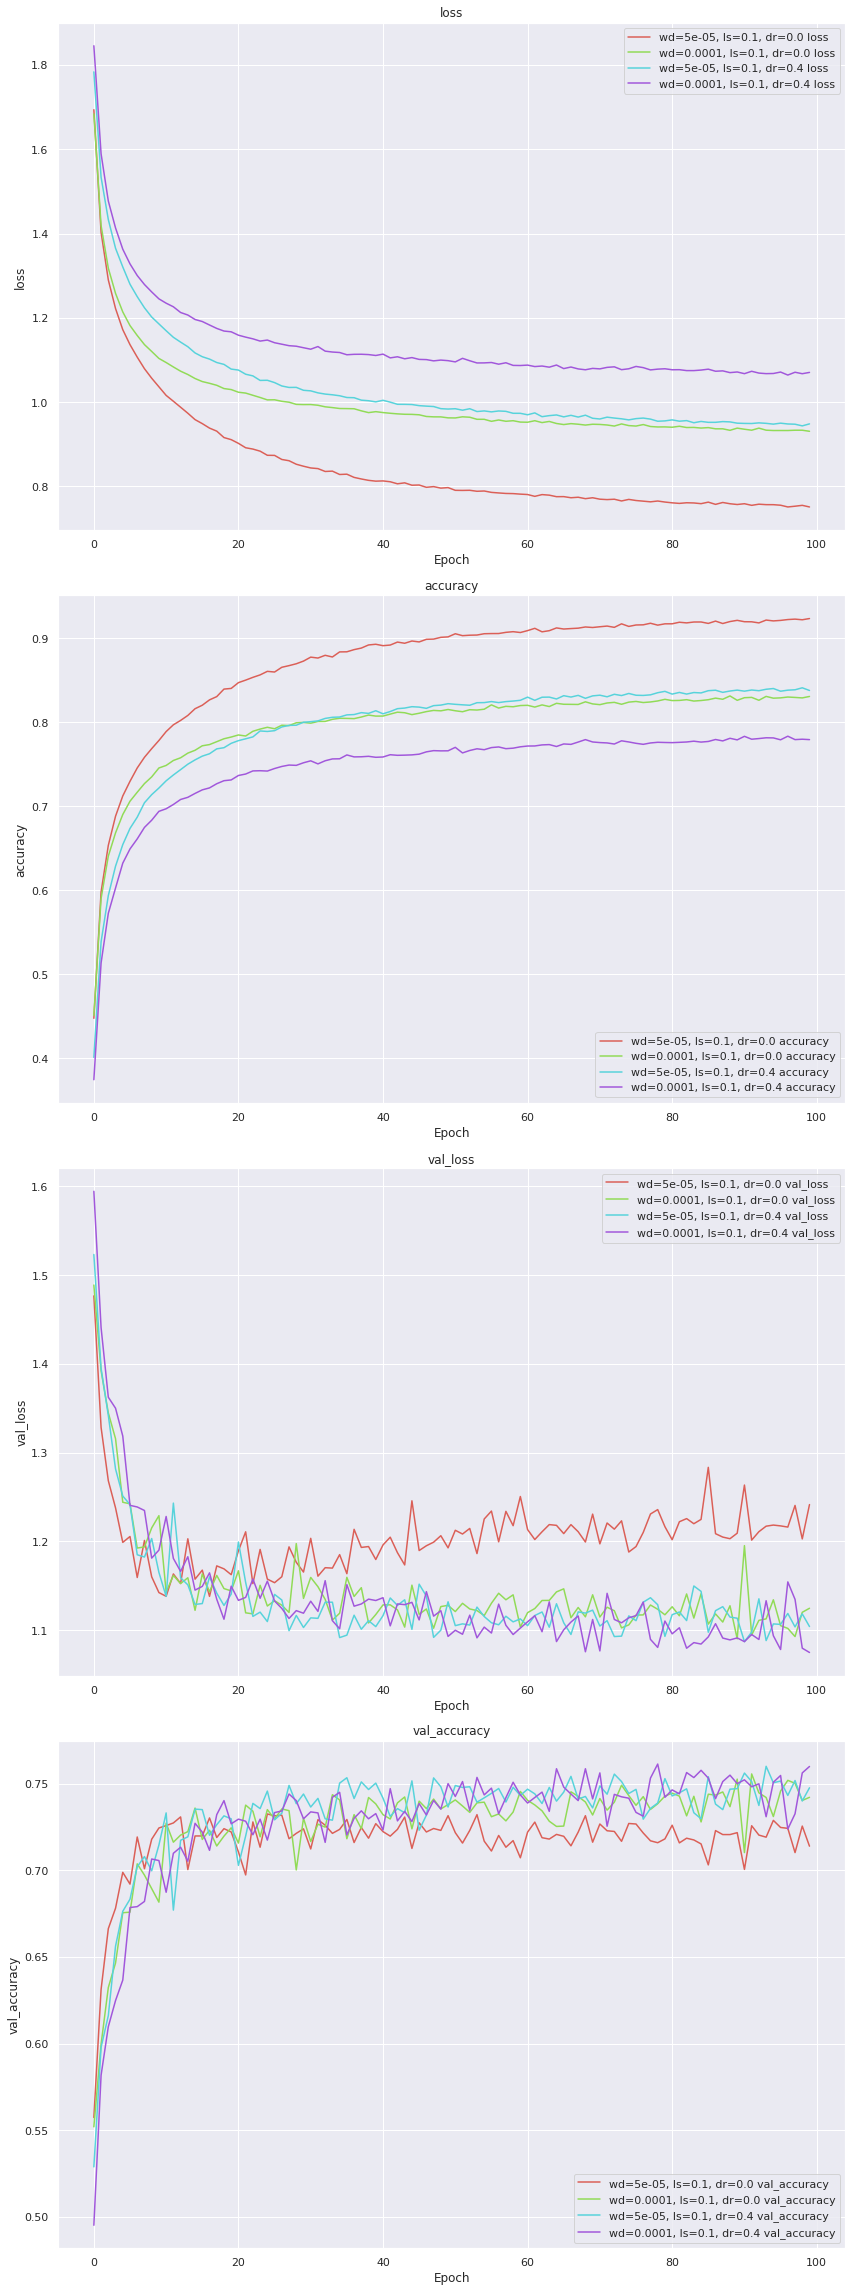

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

def compare_histories(histories, names, color_palette='hls', keys=None):
    # cm = plt.get_cmap('gist_rainbow')
    # num_colors = len(histories)
    # colors = np.random.permutation([cm(1.*i/num_colors) for i in range(num_colors)])
    colors = sns.color_palette(color_palette, len(histories))
    keys = keys if keys is not None else histories[0].keys()
    fig, axes = plt.subplots(len(keys), 1, figsize=(12, 8 * len(keys)))
    axes = axes if isinstance(axes, np.ndarray) else [axes]
    for kk, ax in zip(keys, axes):
        ax.set_title(kk)
        ax.set_prop_cycle('color', colors)
        for hist, name in zip(histories, names):
            ax.plot(hist[kk], label=name + " {}".format(kk))
        ax.set_xlabel('Epoch')
        ax.set_ylabel(kk)
        ax.legend()
    plt.tight_layout()
    plt.show()

# compare_histories(hists, names, keys=['accuracy', 'val_accuracy'])
compare_histories(histories, names)